In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

from src.segmentation.mask import mask_image
from src.detection.lines import detect_lines, combine_image_with_lines

In [4]:
def show_image_lines(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image_blurred = cv2.GaussianBlur(image_gray, ksize=(7, 7), sigmaX=0)
    image_canny = cv2.Canny(image_blurred, threshold1=10, threshold2=200)
    image_masked = mask_image(image_canny)
    image_lines = detect_lines(image_masked)

    image_with_lines = combine_image_with_lines(image, image_lines)
    
    plt.figure(figsize=(20, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("Original")

    plt.subplot(2, 3, 2)
    plt.imshow(image_blurred, cmap="gray")
    plt.title("Gaussian Blur")

    plt.subplot(2, 3, 3)
    plt.imshow(image_canny, cmap="gray")
    plt.title("Canny")

    plt.subplot(2, 3, 4)
    plt.imshow(mask_image(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)), cmap="gray")
    plt.title("Masked Original")

    plt.subplot(2, 3, 5)
    plt.imshow(image_masked, cmap="gray")
    plt.title("Masked")

    plt.subplot(2, 3, 6)
    plt.imshow(image_with_lines)
    plt.title("Lanes")

    plt.show()

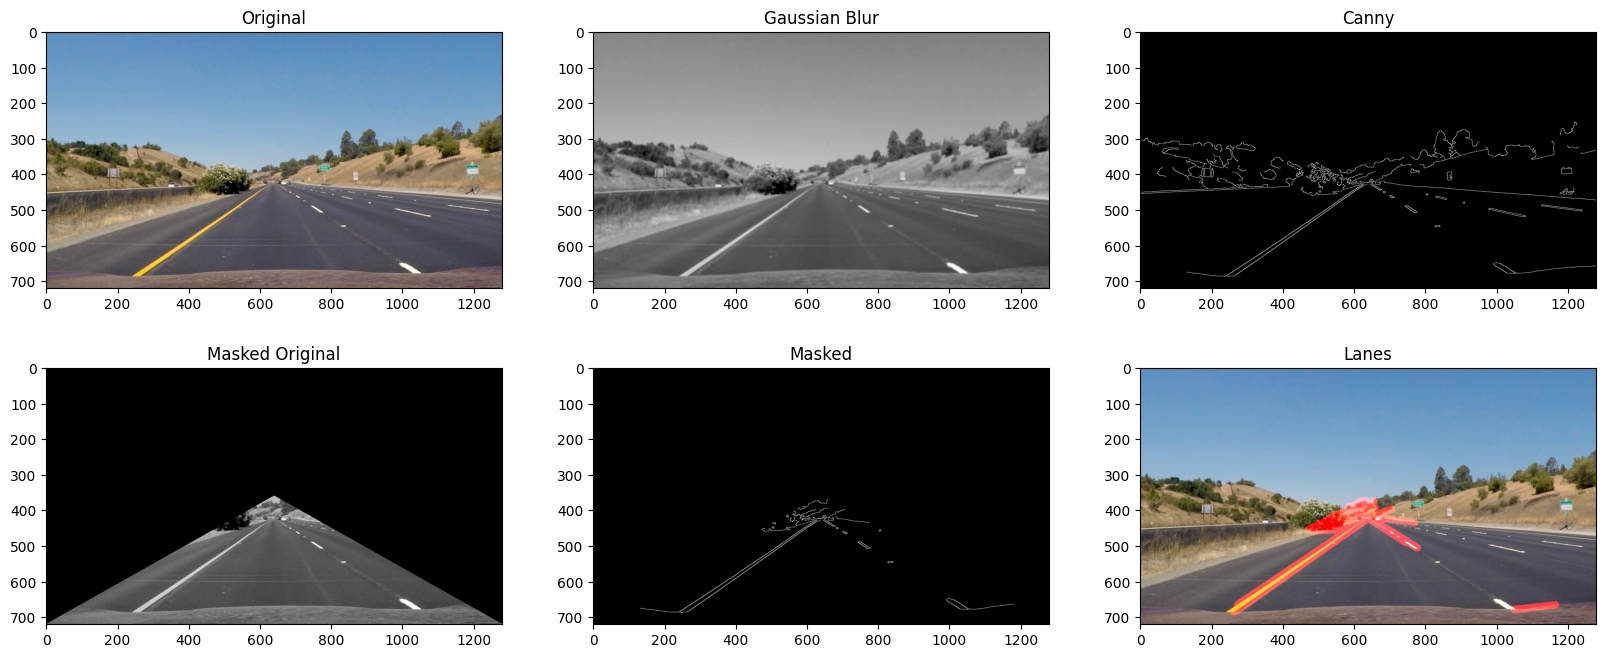

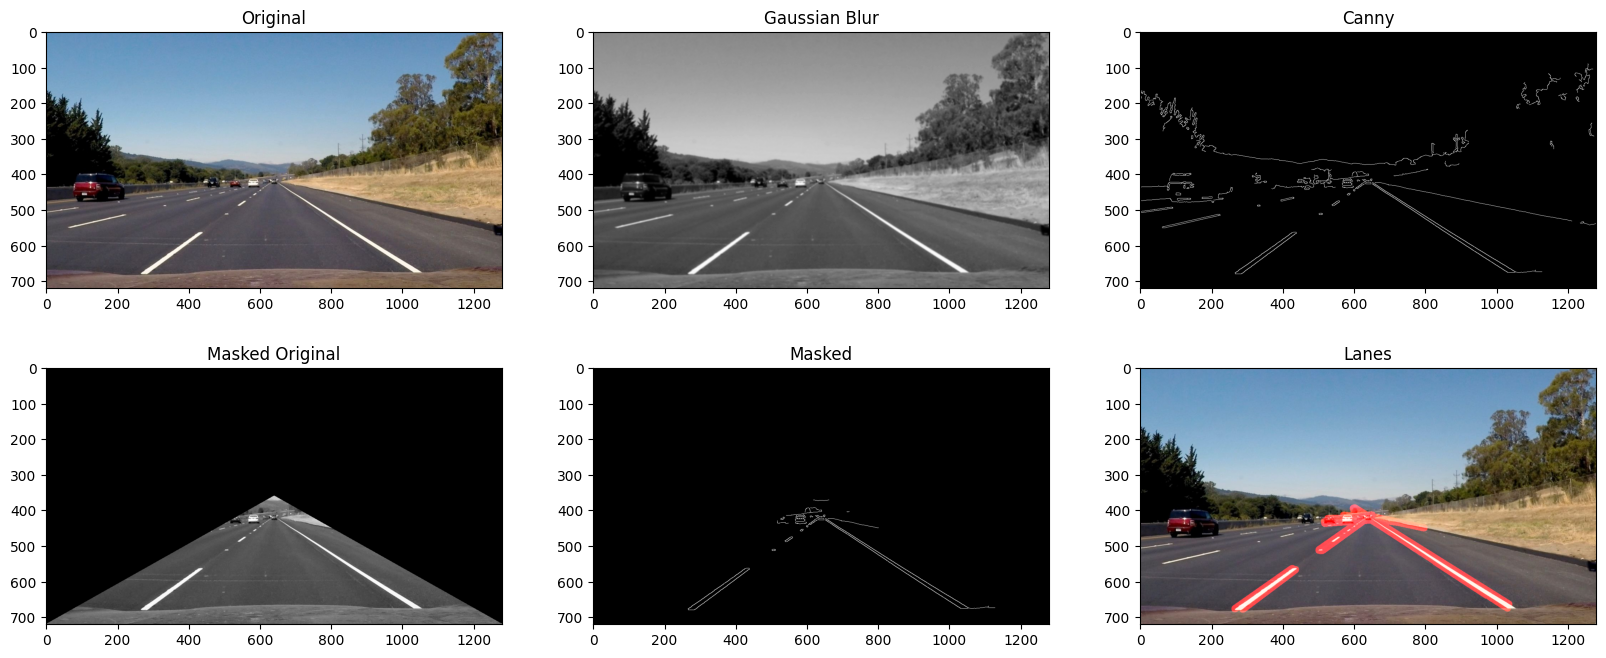

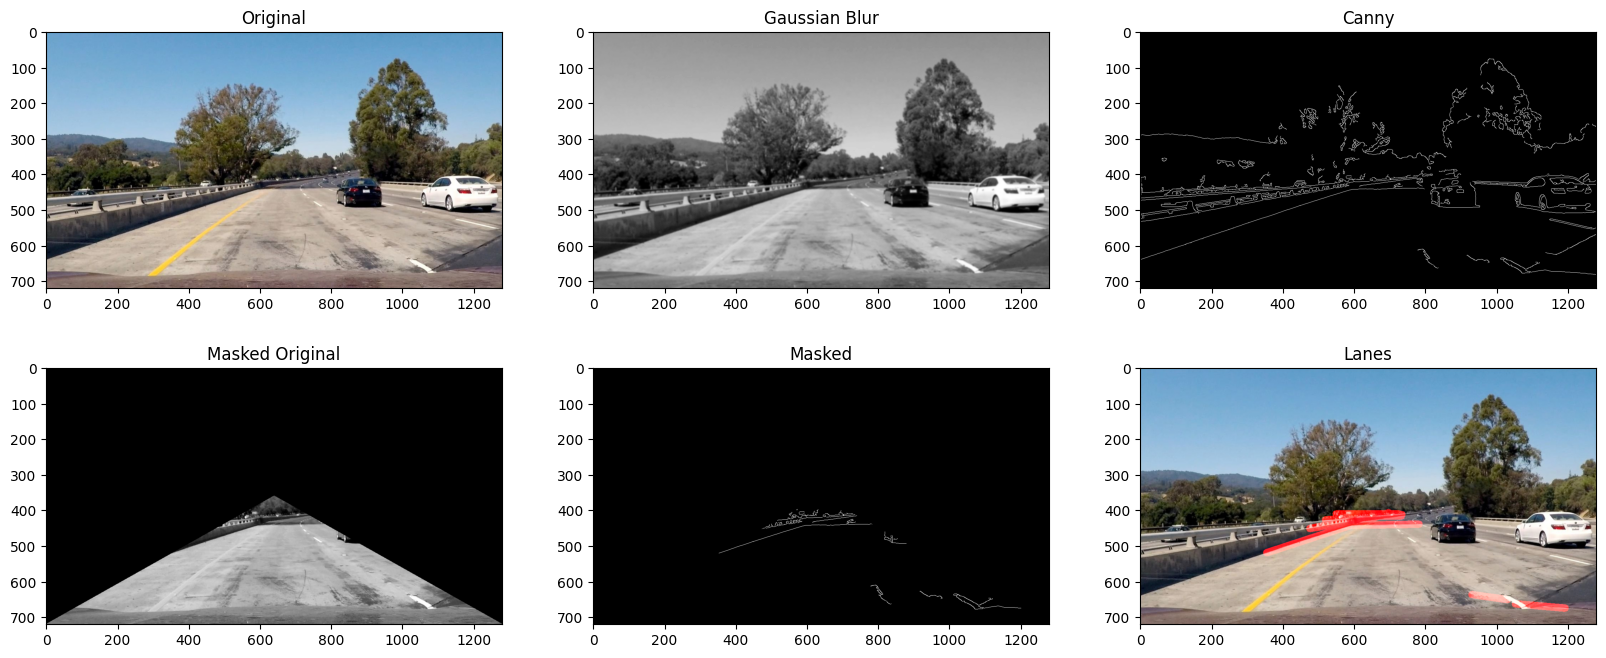

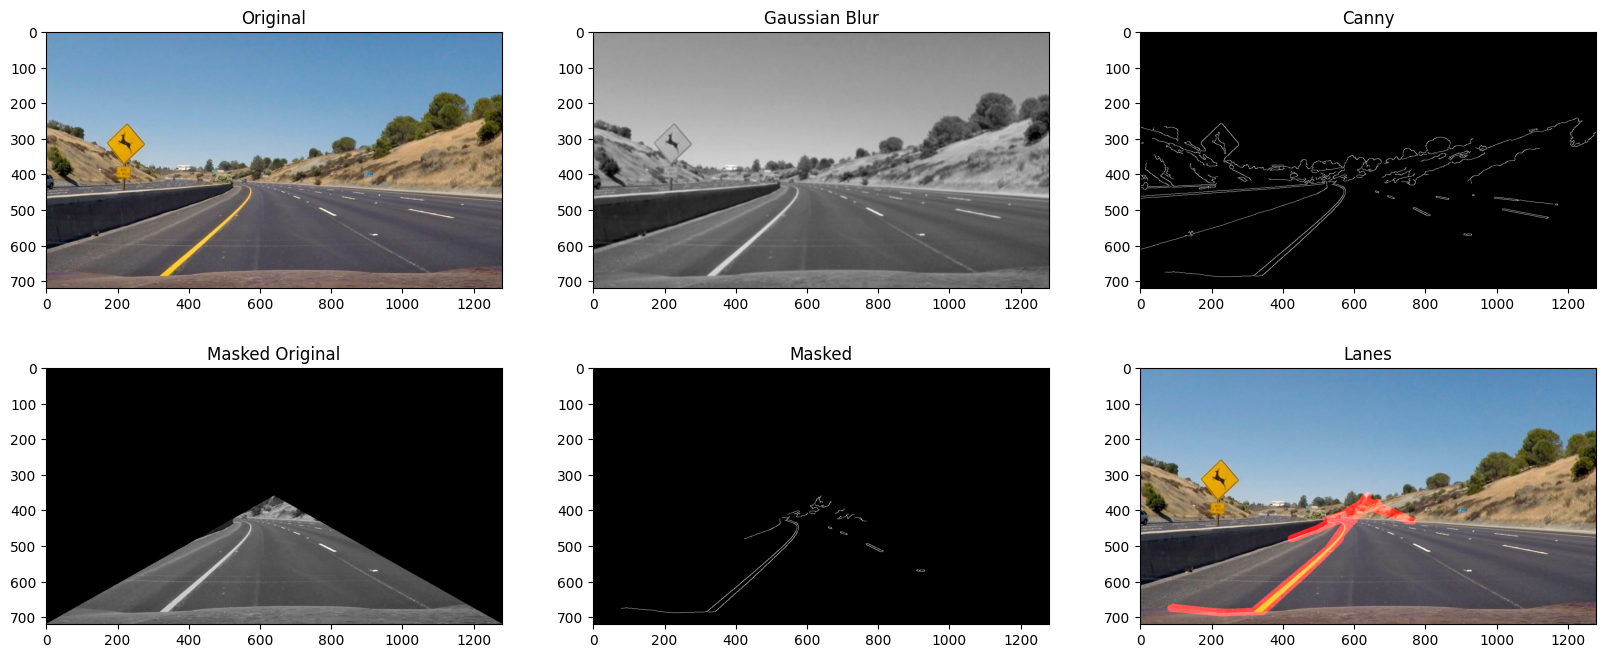

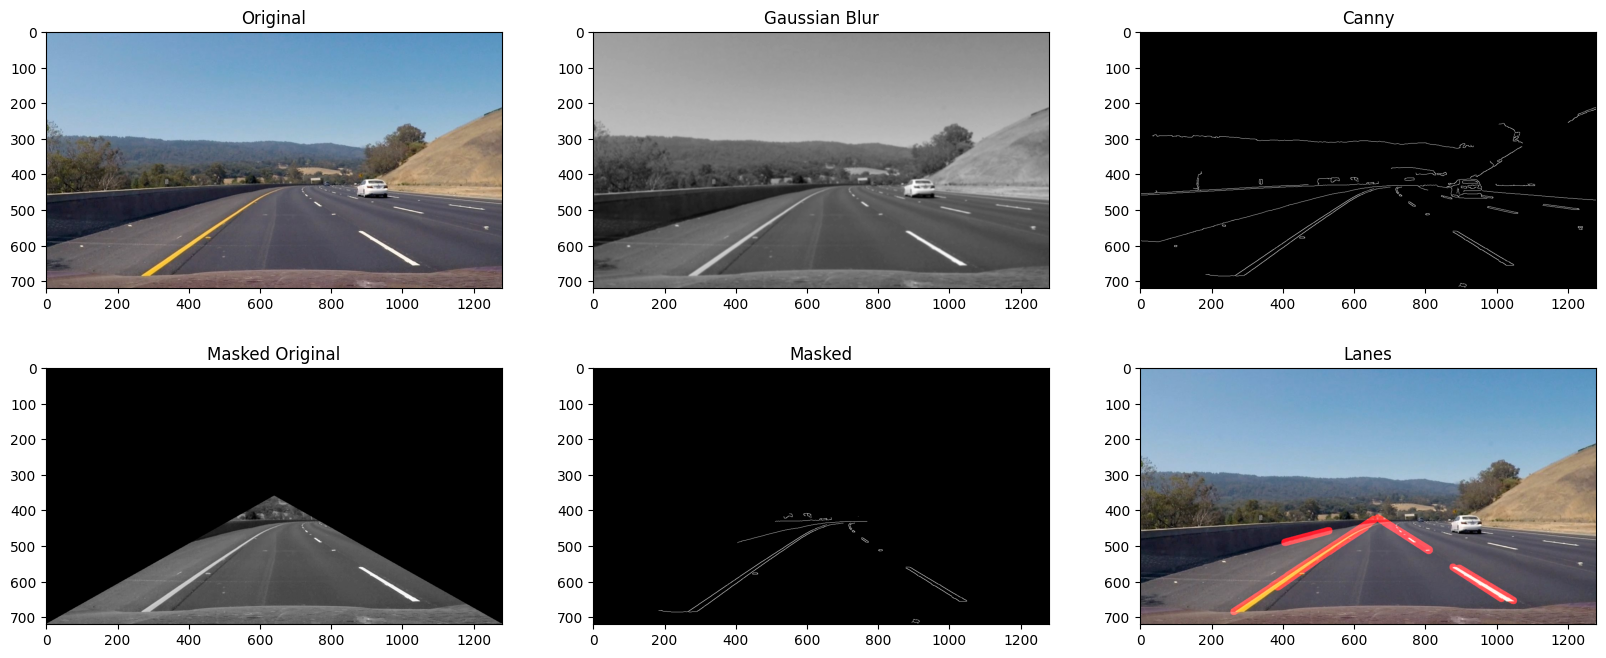

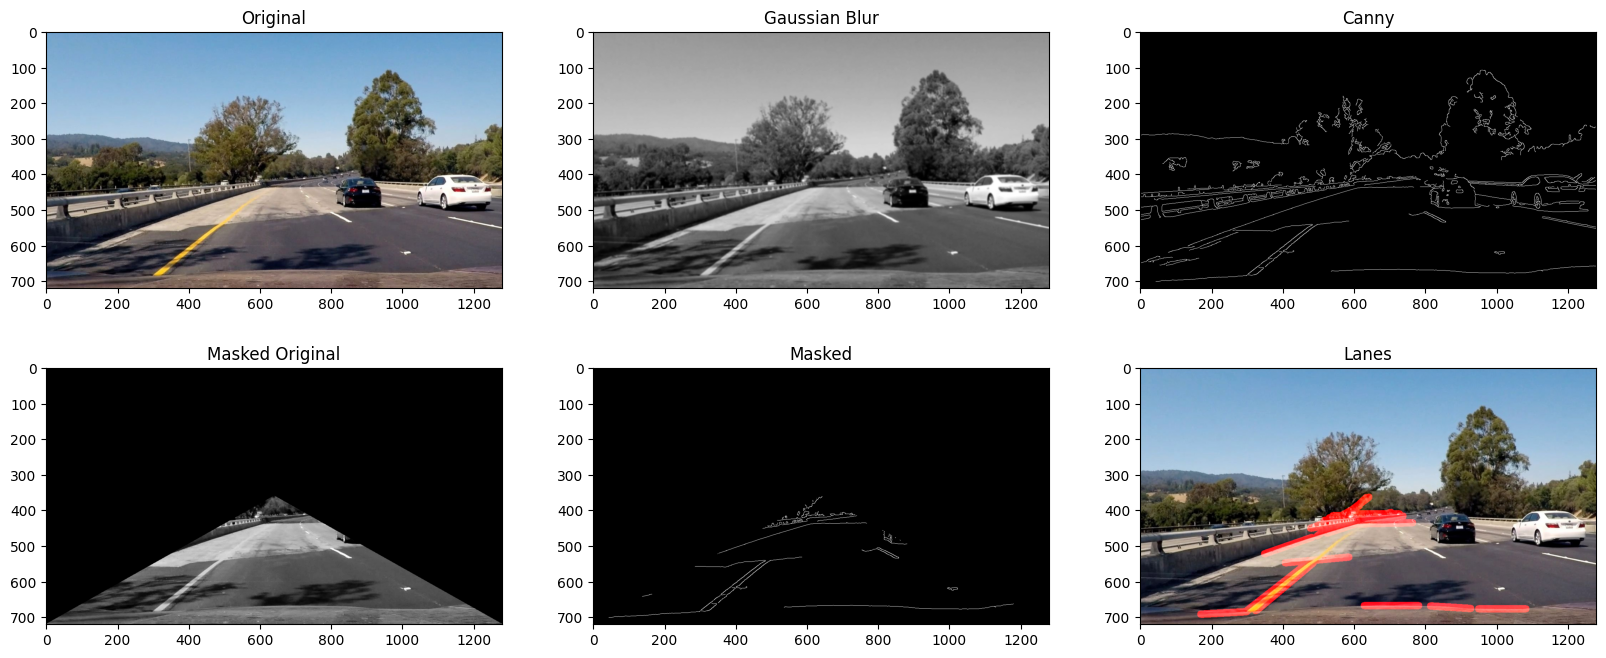

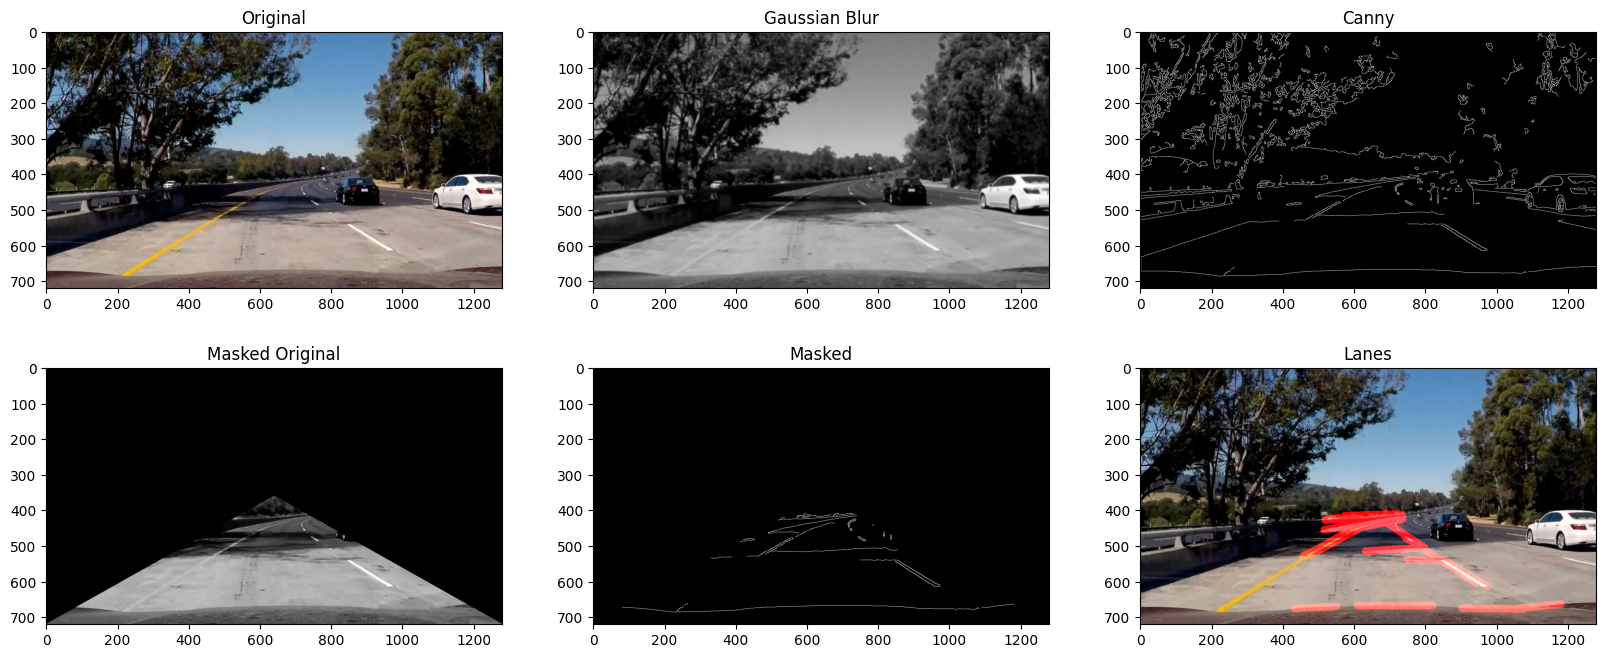

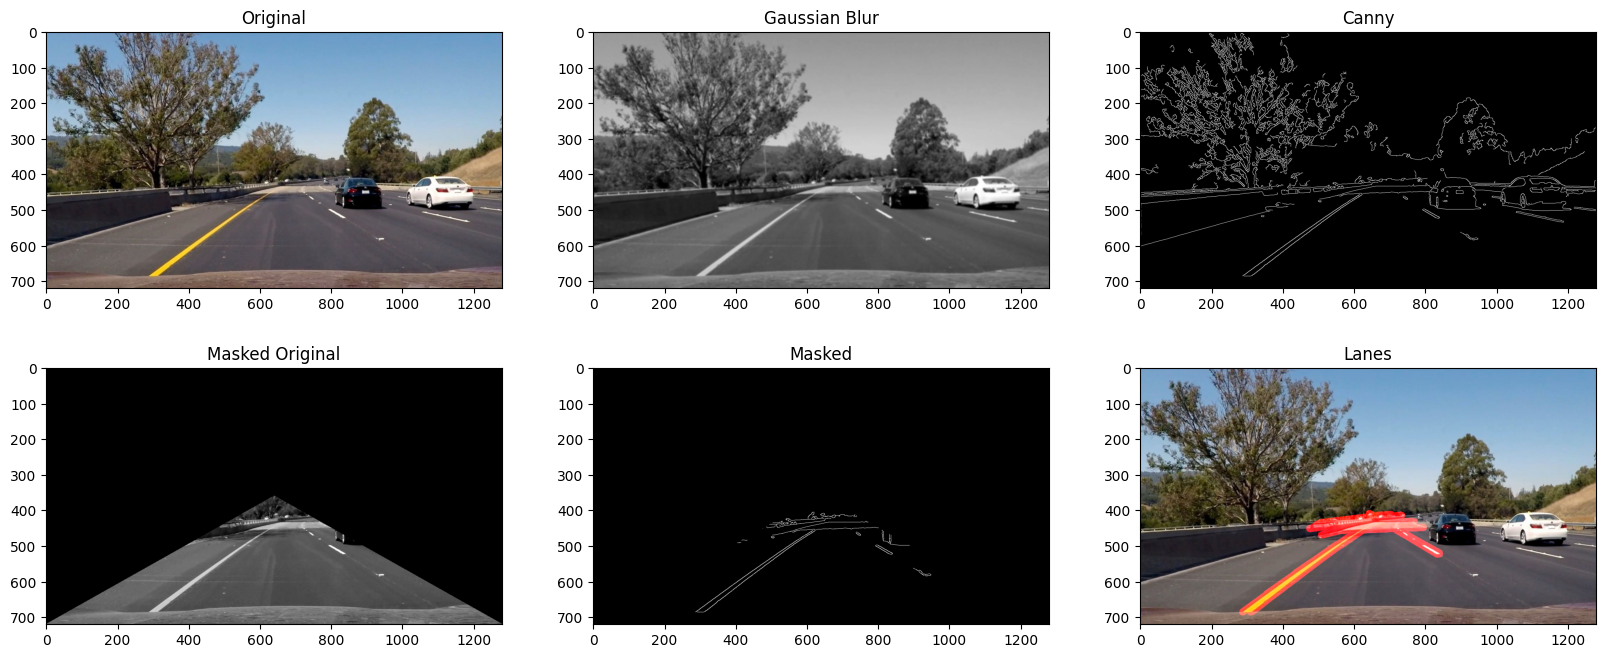

In [5]:
for image_index in range(1, 9):
    image = cv2.imread(f"data/img/Udacity/image00{image_index}.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    show_image_lines(image)
    